<a href="https://colab.research.google.com/github/AnnaBujniewicz/semester_project/blob/main/stock_scrape%2B_unsupervised_for_sds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> nasdaq 100



In [ ]:
! pip install yfinance > /dev/null 2>&1
! mkdir hist

In [ ]:
# Load packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import os, contextlib
import shutil
from sklearn.decomposition import PCA

Load info from wiki

In [ ]:
wiki=pd.read_html('https://en.wikipedia.org/wiki/NASDAQ-100')

In [ ]:
n100_list = wiki[3]

n100 = n100_list
n100.head()

,Company,Ticker,GICS Sector,GICS Sub-Industry
0,Activision Blizzard,ATVI,Communication Services,Interactive Home Entertainment
1,Adobe Inc.,ADBE,Information Technology,Application Software
2,Advanced Micro Devices,AMD,Information Technology,Semiconductors
3,Alexion Pharmaceuticals,ALXN,Health Care,Pharmaceuticals
4,Align Technology,ALGN,Health Care,Health Care Supplies


Load thickers

In [ ]:
ticker_list = list(n100["Ticker"])

Load the close prices

In [ ]:
dataframes = {}
df = pd. DataFrame()
for tick in ticker_list:
  dataframes[tick] = yf.download(tick, 
                      start='2019-01-01', 
                      end='2020-11-30', 
                      progress=False)
  df[tick] = dataframes[tick].iloc[:,3]

In [ ]:
#it is a close price which we will work with
df.head()

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AEP,AMGN,ADI,ANSS,AAPL,AMAT,ASML,TEAM,ADSK,ADP,BIDU,BIIB,BKNG,AVGO,CDNS,CDW,CERN,CHTR,CHKP,CTAS,CSCO,CTSH,CMCSA,CPRT,COST,CSX,DXCM,DOCU,DLTR,EBAY,EA,EXC,...,MELI,MCHP,MU,MSFT,MRNA,MDLZ,MNST,NTES,NFLX,NVDA,NXPI,ORLY,OKTA,PCAR,PAYX,PYPL,PTON,PEP,PDD,QCOM,REGN,ROST,SGEN,SIRI,SWKS,SPLK,SBUX,SNPS,TMUS,TSLA,TXN,TCOM,VRSN,VRSK,VRTX,WBA,WDAY,XEL,XLNX,ZM
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02,47.029999,224.570007,18.830000,98.050003,202.119995,1054.680054,1045.849976,1539.130005,72.940002,191.899994,85.919998,143.009995,39.480000,33.480000,156.300003,89.029999,128.960007,130.139999,162.250000,304.690002,1721.699951,253.509995,43.230000,79.169998,51.869999,287.989990,103.500000,167.490005,42.950001,63.090000,34.369999,47.680000,204.759995,61.950001,115.180000,40.820000,91.199997,28.850000,80.370003,44.070000,...,298.010010,71.349998,32.750000,101.120003,15.330000,39.889999,48.759998,45.948002,267.660004,136.220001,75.029999,341.149994,63.259998,57.860001,65.070000,85.750000,NaN,109.279999,22.209999,57.400002,372.440002,83.779999,57.490002,5.90,67.959999,103.320000,64.320000,84.050003,65.260002,62.023998,94.449997,27.590000,147.759995,108.650002,164.080002,68.040001,159.740005,48.220001,86.849998,NaN
2019-01-03,45.360001,215.699997,17.049999,100.209999,184.779999,1025.469971,1016.059998,1500.280029,72.769997,188.979996,80.730003,137.639999,35.547501,31.540001,147.679993,84.480003,121.849998,126.209999,154.710007,307.000000,1663.119995,230.960007,41.529999,77.129997,50.700001,287.500000,102.349998,164.809998,41.070000,61.099998,34.639999,46.889999,200.419998,60.980000,112.260002,38.830002,90.760002,28.320000,78.709999,44.119999,...,296.589996,66.320000,31.000000,97.400002,15.500000,39.740002,48.000000,44.180000,271.200012,127.989998,71.970001,346.130005,59.560001,56.520000,63.970001,82.089996,NaN,108.260002,21.520000,55.700001,372.079987,83.080002,56.369999,5.94,60.720001,100.809998,61.529999,81.110001,65.019997,60.071999,88.879997,26.959999,142.589996,105.330002,163.729996,67.330002,154.020004,48.029999,83.580002,NaN
2019-01-04,47.169998,226.190002,19.000000,106.000000,186.710007,1078.069946,1070.709961,1575.390015,73.440002,195.440002,82.690002,143.660004,37.064999,33.700001,154.070007,87.089996,128.279999,131.240005,160.949997,318.329987,1717.550049,233.229996,43.259998,77.879997,52.230000,302.739990,105.349998,172.559998,42.919998,63.700001,35.810001,48.560001,206.240005,62.790001,116.239998,40.900002,92.889999,28.969999,84.419998,44.619999,...,315.329987,69.010002,32.700001,101.930000,16.959999,40.840000,49.790001,45.950001,297.570007,136.190002,75.449997,341.820007,63.150002,59.029999,66.199997,86.269997,NaN,110.480003,22.690001,56.599998,397.549988,85.339996,59.540001,6.17,63.630001,108.040001,63.570000,83.900002,67.489998,63.537998,92.900002,28.549999,148.970001,109.980003,172.699997,69.570000,163.350006,48.500000,87.449997,NaN
2019-01-07,48.500000,229.259995,20.570000,107.940002,189.919998,1075.920044,1068.390015,1629.510010,73.029999,198.070007,83.209999,147.320007,36.982498,34.299999,157.589996,92.709999,132.720001,130.529999,162.600006,322.399994,1711.819946,237.979996,43.419998,77.570000,51.930000,301.470001,104.870003,172.850006,43.209999,63.599998,35.430000,48.830002,207.000000,62.450001,129.949997,41.689999,97.959999,29.469999,87.589996,44.700001,...,328.940002,71.029999,34.000000,102.059998,16.270000,41.119999,49.730000,47.897999,315.339996,143.399994,76.010002,339.690002,66.269997,58.959999,65.849998,86.930000,NaN,109.529999,23.209999,56.439999,396.630005,88.930000,62.919998,6.22,64.489998,112.900002,63.570000,85.760002,68.440002,66.991997,94.500000,29.180000,151.399994,110.089996,175.850006,69.970001,163.500000,48.290001,89.760002,NaN
2019-01-08,49.970001,232.679993,20.750000,108.610001,192.949997,1085.369995,1076.280029,1656.579956,73.930000,200.610001,85.239998,148.050003,37.687500,32.910000,156.429993,94.820000,133.8699

In [ ]:
df.index.name = 'date'

In [ ]:
open = yf.download(ticker_list, start='2019-10-30', end='2020-12-01')['Open']

[*********************100%***********************]  102 of 102 completed


visualization of the prices

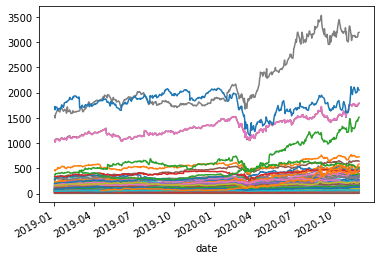

In [ ]:
df.plot.line(legend=False)

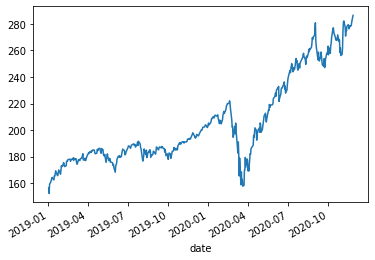

In [ ]:
#lets see the average of the 100 how it is developing
df['average'] = df.mean(axis=1)
df['average'].plot.line()

In [ ]:
stock_returns = df.apply(np.log).diff(1)

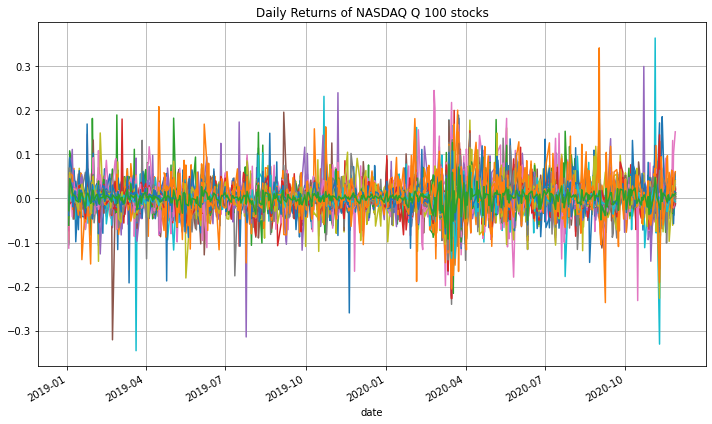

In [ ]:
# Plot the returns development
stock_returns.plot(legend=0, figsize=(10,6), grid=True, title='Daily Returns of NASDAQ Q 100 stocks')
plt.tight_layout()

In [ ]:
stock_returns.describe()

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AEP,AMGN,ADI,ANSS,AAPL,AMAT,ASML,TEAM,ADSK,ADP,BIDU,BIIB,BKNG,AVGO,CDNS,CDW,CERN,CHTR,CHKP,CTAS,CSCO,CTSH,CMCSA,CPRT,COST,CSX,DXCM,DOCU,DLTR,EBAY,EA,EXC,...,MCHP,MU,MSFT,MRNA,MDLZ,MNST,NTES,NFLX,NVDA,NXPI,ORLY,OKTA,PCAR,PAYX,PYPL,PTON,PEP,PDD,QCOM,REGN,ROST,SGEN,SIRI,SWKS,SPLK,SBUX,SNPS,TMUS,TSLA,TXN,TCOM,VRSN,VRSK,VRTX,WBA,WDAY,XEL,XLNX,ZM,average
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,296.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,407.000000,481.000000
mean,0.001056,0.001566,0.003186,0.000485,0.001779,0.001096,0.001121,0.001519,0.000316,0.000329,0.000981,0.001741,0.002251,0.001879,0.002141,0.001918,0.001558,0.000619,-0.000315,-0.000464,0.000366,0.000922,0.002062,0.001066,0.000742,0.001669,0.000303,0.001597,-0.000012,0.000452,0.000851,0.001834,0.001331,0.000806,0.002113,0.003566,0.000388,0.001198,0.000904,-0.000113,...,0.001295,0.001400,0.001570,0.004396,0.000759,0.001134,0.001473,0.001263,0.002826,0.001561,0.000544,0.002738,0.000866,0.000751,0.001876,0.004873,0.000582,0.003887,0.001910,0.000670,0.000557,0.002243,0.000217,0.001445,0.001415,0.000889,0.002051,0.001463,0.004668,0.001083,0.000447,0.000635,0.001250,0.000672,-0.001157,0.000702,0.000703,0.000955,0.004985,0.001254
std,0.023906,0.024251,0.036404,0.024530,0.038449,0.020499,0.020541,0.020212,0.018485,0.019671,0.026379,0.023268,0.024153,0.031611,0.025432,0.026830,0.026478,0.022148,0.025792,0.037501,0.026136,0.027322,0.024027,0.025398,0.016965,0.018570,0.017562,0.025537,0.022130,0.024437,0.019299,0.021865,0.014932,0.023306,0.032637,0.033030,0.025171,0.019939,0.023439,0.023236,...,0.031839,0.032852,0.021925,0.050867,0.016896,0.020221,0.026025,0.026035,0.032266,0.031729,0.021498,0.029669,0.019163,0.023336,0.026212,0.047013,0.017886,0.039078,0.029268,0.023451,0.027824,0.029185,0.021809,0.029946,0.030163,0.022345,0.022298,0.020677,0.045986,0.023046,0.029313,0.020382,0.018835,0.024614,0.025064,0.027960,0.018962,0.028741,0.046817,0.017356
min,-0.112462,-0.159525,-0.158280,-0.107274,-0.314546,-0.123685,-0.117667,-0.082535,-0.123103,-0.086220,-0.181700,-0.131797,-0.137708,-0.227624,-0.190545,-0.095016,-0.127864,-0.165495,-0.180553,-0.345742,-0.119205,-0.222055,-0.134653,-0.152523,-0.064214,-0.154654,-0.100780,-0.184656,-0.118615,-0.188498,-0.087358,-0.151511,-0.065238,-0.169017,-0.187498,-0.159155,-0.173398,-0.095770,-0.142777,-0.175415,...,-0.226830,-0.220878,-0.159453,-0.198047,-0.121374,-0.082664,-0.121326,-0.118095,-0.203979,-0.215431,-0.167529,-0.110354,-0.079211,-0.216667,-0.172259,-0.226717,-0.121358,-0.259912,-0.161875,-0.110813,-0.227651,-0.142469,-0.149641,-0.200805,-0.185260,-0.176788,-0.141438,-0.118882,-0.236518,-0.125855,-0.106380,-0.130485,-0.112936,-0.231875,-0.137025,-0.136439,-0.135726,-0.187258,-0.190800,-0.119149
25%,-0.011655,-0.008410,-0.015285,-0.013574,-0.014308,-0.006582,-0.006450,-0.008149,-0.005979,-0.008366,-0.010936,-0.008966,-0.007483,-0.011660,-0.008964,-0.013016,-0.009658,-0.006934,-0.013039,-0.010884,-0.010824,-0.009748,-0.008401,-0.008490,-0.006532,-0.005717,-0.006242,-0.007074,-0.008123,-0.007913,-0.007869,-0.005882,-0.005169,-0.008226,-0.013963,-0.010191,-0.009914,-0.008354,-0.009988,-0.008231,...,-0.013855,-0.015293,-0.007752,-0.023158,

Preparing for unsupervised ml

In [ ]:
q1 = df.loc['2020-01-01':'2020-04-30']

In [ ]:
# Create empty dataframe
# add the company also into the dataframe
stocks = pd.DataFrame(data=None, columns=['ticker', 'company', 'sector', 'industry'])
stocks['ticker']=q1.columns
stocks.head()

,ticker,company,sector,industry
0,ATVI,NaN,NaN,NaN
1,ADBE,NaN,NaN,NaN
2,AMD,NaN,NaN,NaN
3,ALXN,NaN,NaN,NaN
4,ALGN,NaN,NaN,NaN


In [ ]:
# add sector

for i in range(len(stocks)):
  for j in range(len(n100['Ticker'])):
    if stocks['ticker'][i] == n100['Ticker'][j]:
      stocks['sector'][i] = n100['GICS Sector'][j]
    else: continue

# add industry

for i in range(len(stocks)):
  for j in range(len(n100['Ticker'])):
    if stocks['ticker'][i] == n100['Ticker'][j]:
      stocks['industry'][i] = n100['GICS Sub-Industry'][j]
    else: continue

#add company
for i in range(len(stocks)):
  for j in range(len(n100['Ticker'])):
    if stocks['ticker'][i] == n100['Ticker'][j]:
      stocks['company'][i] = n100['Company'][j]
    else: continue

In [ ]:
stocks['return'] = [(q1[i]['2020-04-30']/q1[i]['2020-01-02'] - 1) for i in stocks['ticker']]

In [ ]:
# FYI: Which stocks closed higher than at the beginning of the period?
print(len(stocks[stocks['return'] > 0]))
stocks[stocks['return'] > 0]

38


,ticker,company,sector,industry,return
0,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment,0.086615
1,ADBE,Adobe Inc.,Information Technology,Application Software,0.057441
2,AMD,Advanced Micro Devices,Information Technology,Semiconductors,0.067006
7,AMZN,Amazon.com,Consumer Discretionary,Internet & Direct Marketing Retail,0.303470
11,ANSS,ANSYS,Information Technology,Application Software,0.008629
15,TEAM,Atlassian,Information Technology,Application Software,0.265381
19,BIIB,Biogen,Health Care,Biotechnology,0.008802
22,CDNS,Cadence Design Systems,Information Technology,Application Software,0.135638
25,CHTR,"Charter Communications, Inc.",Communication Services,Cable & Satellite,0.009787
32,COST,Costco Wholesale Corporation,Consumer Staples,Hypermarkets & Super Centers,0.039487


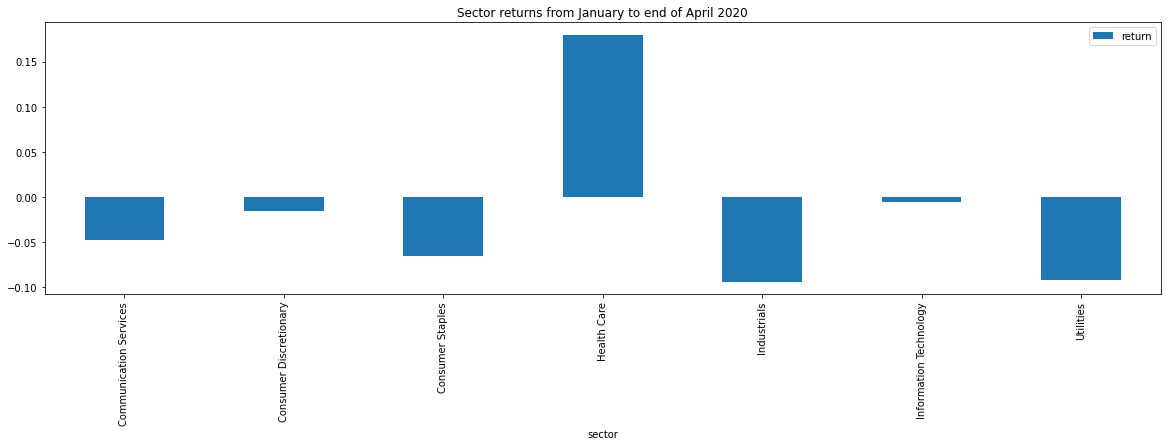

In [ ]:
sector_return = stocks.groupby('sector').mean()
sector_return.plot.bar(figsize=(20,5))
plt.title('Sector returns from January to end of April 2020')
plt.savefig('sectors.png', bbox_inches='tight')

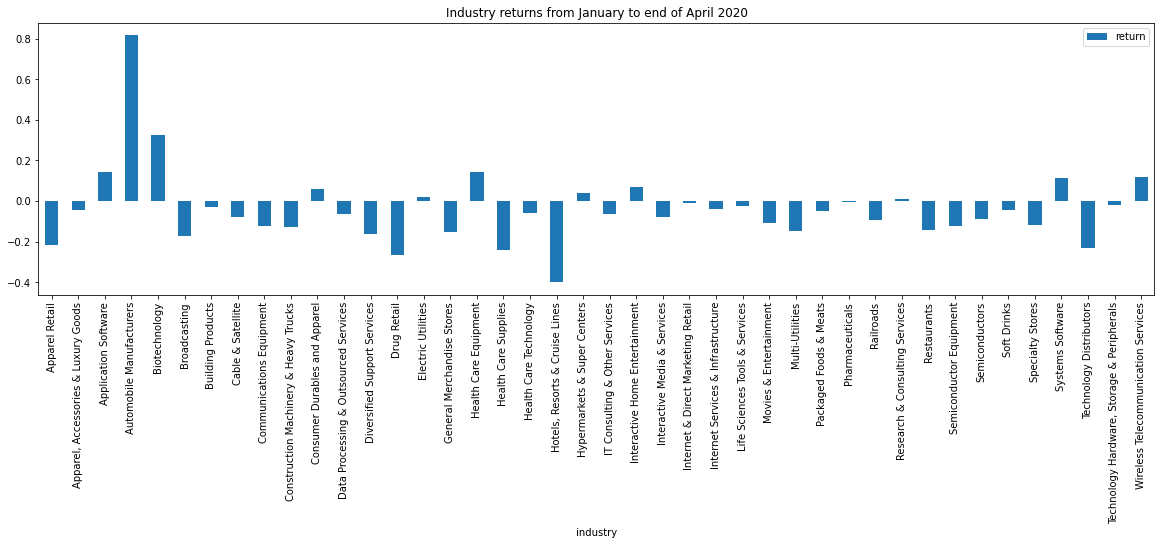

In [ ]:
industry_return = stocks.groupby('industry').mean()
industry_return.plot.bar(figsize=(20,5))
plt.title('Industry returns from January to end of April 2020')
plt.savefig('industries.png', bbox_inches='tight')

In [ ]:
stocks['return_class'] = 'tbd'
for i in range(len(stocks)):
  if stocks['return'][i] > 0:
    stocks['return_class'][i] = 'positive'
  elif stocks['return'][i] < 0:
    stocks['return_class'][i] = 'negative'
  else: stocks['return_class'][i] = 'neutral'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
stocks.head()

,ticker,company,sector,industry,return,return_class
0,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment,0.086615,positive
1,ADBE,Adobe Inc.,Information Technology,Application Software,0.057441,positive
2,AMD,Advanced Micro Devices,Information Technology,Semiconductors,0.067006,positive
3,ALXN,Alexion Pharmaceuticals,Health Care,Pharmaceuticals,-0.003431,negative
4,ALGN,Align Technology,Health Care,Health Care Supplies,-0.242633,negative


In [ ]:
stocks['return_class'].value_counts()

negative    65
positive    38
Name: return_class, dtype: int64

In [ ]:
# Define the companies we retrieve fundamentals for according to the selection made above
#filter_list = ['TSLA','GOOGL','AMZN','ALXN']
symbols_filtered = [x for x in  ticker_list]
len(symbols_filtered)

102

In [ ]:
# Define which of the fundamental to keep
ts = yf.Ticker("TSLA")
all = list(ts.info.keys())
to_keep = ['beta', 'enterpriseToEbitda', 'enterpriseToRevenue', 'forwardEps', 'trailingEps', 'forwardPE', 'trailingPE', 'fullTimeEmployees', 'priceToBook', 'profitMargins']
to_drop = [field for field in all if field not in to_keep]

In [ ]:
#Get info (fundamental, valuation, and general information) data for each stock in the index
# We did this once and saved the output as a csv file to avoid running the time-consuming code again and again.
# Thus, now it is formatted as comments.

n100_stats = {}
for symbol in symbols_filtered:
    ticker1 = yf.Ticker(symbol)
    temp = ticker1.info
 
    n100_stats[symbol] = temp

In [ ]:
# combine all the stats valuation tables into a single data frame
combined_stats = pd.DataFrame(n100_stats)

# filter not needed rows
combined_stats.drop(to_drop, inplace=True)
combined_stats.drop('fax', inplace=True)
#combined_stats.drop(['underlyingSymbol', 'underlyingExchangeSymbol', 'headSymbol', 'uuid', 'fax'], inplace=True)

In [ ]:
combined_stats

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AEP,AMGN,ADI,ANSS,AAPL,AMAT,ASML,TEAM,ADSK,ADP,BIDU,BIIB,BKNG,AVGO,CDNS,CDW,CERN,CHTR,CHKP,CTAS,CSCO,CTSH,CMCSA,CPRT,COST,CSX,DXCM,DOCU,DLTR,EBAY,EA,EXC,...,MELI,MCHP,MU,MSFT,MRNA,MDLZ,MNST,NTES,NFLX,NVDA,NXPI,ORLY,OKTA,PCAR,PAYX,PYPL,PTON,PEP,PDD,QCOM,REGN,ROST,SGEN,SIRI,SWKS,SPLK,SBUX,SNPS,TMUS,TSLA,TXN,TCOM,VRSN,VRSK,VRTX,WBA,WDAY,XEL,XLNX,ZM
fullTimeEmployees,9080,NaN,11400,3082,14530,132121,132121,1125300,17408,23400,15900,4500,147000,24000,24749,4907,10100,58000,37779,7400,23000,21000,8100,9980,27400,95100,5258,40000,77500,283100,190000,7600,156000,19000,3900,3909,56900,13300,9800,32713,...,9703,18000,40000,163000,1100,80000,1273,20797,8600,13775,29400,76027,2604,27000,15600,23200,4404,267000,5828,41000,8314,92500,1605,4534,10000,5800,349000,15036,53000,48016,29768,44300,872,9060,3000,223000,12400,11273,4891,3871
beta,0.671916,0.967979,2.26719,1.25459,1.67507,0.997375,0.997375,1.20105,0.212598,0.754855,1.32178,1.22257,1.29764,1.48346,0.88372,0.977777,1.44409,0.71916,1.07506,0.492388,1.21102,1.02835,1.04409,1.10656,0.745931,1.01155,0.650393,1.48871,0.937532,1.13123,1.01732,1.02887,0.674015,1.20315,0.844619,0.902737,0.774278,1.25932,0.893963,0.39895,...,1.65459,1.69921,1.36535,0.823097,1.83408,0.617847,1.10446,0.585301,0.932283,1.46877,1.53543,0.993175,0.989561,1.05144,0.910761,1.10341,None,0.579527,1.55337,1.36168,0.315485,0.920209,1.09344,1.14068,1.221,1.49291,0.805774,1.09764,0.529658,2.15118,1.07769,1.36168,0.814698,0.775853,0.785301,0.51811,1.48609,0.237795,0.985301,None
trailingPE,32.1446,45.9326,125.054,36.2567,23.8588,33.5494,33.6126,96.0719,21.1056,18.3216,44.5671,82.3642,40.7683,22.1888,70.3995,NaN,155.296,30.1701,17.1131,8.0183,65.4632,68.7152,35.0661,25.641,30.4728,51.8149,22.9815,39.2855,18.0081,30.0482,22.9641,44.3844,38.4446,25.0986,149.967,NaN,26.6239,7.0111,31.6581,17.2551,...,NaN,58.5574,30.3204,35.7606,NaN,27.3714,41.2168,14.3845,84.7206,85.9621,NaN,20.2247,NaN,20.9439,31.4471,87.3623,NaN,29.1703,NaN,33.1748,17.5291,142.43,69.3731,27.161,31.8229,NaN,134.139,60.1663,45.9269,1328.45,30.7969,NaN,30.9434,51.0747,22.8028,75.7996,NaN,23.3713,58.0474,245.587
forwardPE,25.8701,37.6002,50.4317,12.0548,62.7928,28.3469,28.4003,72.3596,17.5668,13.3629,23.0932,51.3929,30.7402,16.1974,41.553,164.817,57.913,27.4581,21.0575,9.65821,39.5208,15.5797,47.1254,19.432,24.2174,30.9564,19.3815,35.7743,13.1988,20.4207,17.5979,36.1543,34.134,20.8614,111.622,201.696,17.3871,13.6622,23.8339,14.1178,...,538.66,19.1851,10.0028,29.676,10.8103,20.5674,34.9084,22.206,57.9657,44.9044,19.5571,19.5078,26052,15.9019,29.3439,51.219,-159.753,24.3488,325.655,18.8616,13.015,26.9209,3674,23.7407,17.7616,-663,31.0762,36.1336,47.6,180.932,27.9553,None,36.7294,37.8969,20.1979,7.57996,81.7,22.1044,42.5449,118.194
enterpriseToRevenue,8.718,18.591,12.7,5.947,17.844,6.228,6.241,4.82,4.929,6.17,10.466,19.962,8.396,4.621,None,33.21,18.168,5.173,None,2.924,10.292,8.831,14.714,1.219,4.415,4.957,8.412,5.591,3.624,2.522,3.207,13.214,0.937,7.814,18.703,32.559,1.358,3.35,6.514,2.418,...,25.333,8.497,3.693,11.021,165.831,3.857,10.551,None,10.139,21.86,6.046,3.347,43.157,1.857,8.369,13.144,18.64,3.48,None,7.426,5.426,3.546,16.889,4.488,7.323,12.553,6.172,10.514,4.362,23.448,10.967,None,20.012,13.345,9.164,0.539,13.535,4.927,11.36,50.724
profitMargins,0.2889,0.40877,0.10166,0.16317,0.75995,0.20799,0.20799,0.04994,0.12852,0.29423,0.21787,0.2488,0.20914,0.21038,0.24252,-0.25816,0.11744,0.1707,0.22369,0.35633,0.15679,0.12391,0.42678,0.04077,0.14279,0.05695,0.41475,0.13902,0.21764,0.08781,0.09895,0.30391,0.025,0.26083,0.12694,-0.16828,0.0384,0.45565,0.23506,0.07142,...,-0.00124,0.11622,0.12536,0.32285,-2.42342,0.11731,0.26989,0.20305,0.11781,0.25892,-0.01701,0.1496,-0.31379,0.07386,0.26655,0.15479,0.02016,0.1027,-0.17274,0.2209,0.34143,0.02391,0.25343,0.13282,0.24281,-0.34769,0.03947,0.18027,0.05114,0.01973,0.36236,-0.10343,0.64199,0.24334,0.44911,0.00327,-0.08136,0.12982,0.20583,0.2182
enterpriseToEbitda,23.036,47.912,76.626,

In [ ]:
combined_stats=combined_stats.transpose()

In [ ]:
combined_stats

,fullTimeEmployees,beta,trailingPE,forwardPE,enterpriseToRevenue,profitMargins,enterpriseToEbitda,forwardEps,trailingEps,priceToBook,address2,underlyingSymbol,underlyingExchangeSymbol,headSymbol,uuid
ATVI,9080,0.671916,32.1446,25.8701,8.718,0.2889,23.036,3.54,2.849,4.92101,NaN,NaN,NaN,NaN,NaN
ADBE,NaN,0.967979,45.9326,37.6002,18.591,0.40877,47.912,13.23,10.83,17.9643,NaN,NaN,NaN,NaN,NaN
AMD,11400,2.26719,125.054,50.4317,12.7,0.10166,76.626,1.83,0.738,28.6882,NaN,NaN,NaN,NaN,NaN
ALXN,3082,1.25459,36.2567,12.0548,5.947,0.16317,11.23,12.96,4.309,3.08938,NaN,NaN,NaN,NaN,NaN
ALGN,14530,1.67507,23.8588,62.7928,17.844,0.75995,96.806,8.35,21.976,13.6286,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBA,223000,0.51811,75.7996,7.57996,0.539,0.00327,16.348,5.19,0.519,1.6501,NaN,None,None,None,888fa4a2-1f3d-3718-83dd-229207680ca9
WDAY,12400,1.48609,NaN,81.7,13.535,-0.08136,1098.3,2.9,-1.445,18.3895,NaN,None,None,None,ee0b6181-c505-339e-b6b1-1498fe62d99c
XEL,11273,0.237795,23.3713,22.1044,4.927,0.12982,14.049,2.97,2.809,2.50391,NaN,None,None,None,d977fcfc-aff2-3286-97db-8771b2b3be45
XLNX,4891,0.985301,58.0474,42.5449,11.36,0.20583,36.072,3.34,2.448,14.1972,NaN,None,None,None,ac08a31b-4c1b-3bd5-8258-fa0a2afa17e2


In [ ]:
stock_stats = stocks.merge(combined_stats, left_on='ticker', right_index=True, how='outer')
stock_stats

,ticker,company,sector,industry,return,return_class,fullTimeEmployees,beta,trailingPE,forwardPE,enterpriseToRevenue,profitMargins,enterpriseToEbitda,forwardEps,trailingEps,priceToBook,address2,underlyingSymbol,underlyingExchangeSymbol,headSymbol,uuid
0,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment,0.086615,positive,9080,0.671916,32.1446,25.8701,8.718,0.2889,23.036,3.54,2.849,4.92101,NaN,NaN,NaN,NaN,NaN
1,ADBE,Adobe Inc.,Information Technology,Application Software,0.057441,positive,NaN,0.967979,45.9326,37.6002,18.591,0.40877,47.912,13.23,10.83,17.9643,NaN,NaN,NaN,NaN,NaN
2,AMD,Advanced Micro Devices,Information Technology,Semiconductors,0.067006,positive,11400,2.26719,125.054,50.4317,12.7,0.10166,76.626,1.83,0.738,28.6882,NaN,NaN,NaN,NaN,NaN
3,ALXN,Alexion Pharmaceuticals,Health Care,Pharmaceuticals,-0.003431,negative,3082,1.25459,36.2567,12.0548,5.947,0.16317,11.23,12.96,4.309,3.08938,NaN,NaN,NaN,NaN,NaN
4,ALGN,Align Technology,Health Care,Health Care Supplies,-0.242633,negative,14530,1.67507,23.8588,62.7928,17.844,0.75995,96.806,8.35,21.976,13.6286,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,WDAY,"Workday, Inc.",Information Technology,Application Software,-0.080975,negative,12400,1.48609,NaN,81.7,13.535,-0.08136,1098.3,2.9,-1.445,18.3895,NaN,None,None,None,ee0b6181-c505-339e-b6b1-1498fe62d99c
99,XEL,"Xcel Energy, Inc.",Utilities,Electric Utilities,0.018916,positive,11273,0.237795,23.3713,22.1044,4.927,0.12982,14.049,2.97,2.809,2.50391,NaN,None,None,None,d977fcfc-aff2-3286-97db-8771b2b3be45
100,XLNX,"Xilinx, Inc.",Information Technology,Semiconductors,-0.140187,negative,4891,0.985301,58.0474,42.5449,11.36,0.20583,36.072,3.34,2.448,14.1972,NaN,None,None,None,ac08a31b-4c1b-3bd5-8258-fa0a2afa17e2
101,ZM,Zoom Video Communications,Information Technology,Application Software,0.966967,positive,3871,None,245.587,118.194,50.724,0.2182,221.422,2.99,1.439,67.3785,6th Floor,None,None,None,70f73ee5-133f-39c2-b135-16067fabfd87


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
stock_stats_full=stock_stats.replace('None',np.nan)

In [ ]:
#imp=SimpleImputer(missing_values='None')

In [ ]:
imp=SimpleImputer(missing_values=np.nan)

In [ ]:
# Check for NaN values
print(stock_stats.isna().sum().sum())

508


In [ ]:
stock_stats_full

,ticker,company,sector,industry,return,return_class,fullTimeEmployees,beta,trailingPE,forwardPE,enterpriseToRevenue,profitMargins,enterpriseToEbitda,forwardEps,trailingEps,priceToBook,address2,underlyingSymbol,underlyingExchangeSymbol,headSymbol,uuid
0,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment,0.086615,positive,9080.0,0.671916,32.144610,25.870058,8.718,0.28890,23.036,3.54,2.849,4.921010,NaN,NaN,NaN,NaN,NaN
1,ADBE,Adobe Inc.,Information Technology,Application Software,0.057441,positive,NaN,0.967979,45.932594,37.600155,18.591,0.40877,47.912,13.23,10.830,17.964321,NaN,NaN,NaN,NaN,NaN
2,AMD,Advanced Micro Devices,Information Technology,Semiconductors,0.067006,positive,11400.0,2.267191,125.054210,50.431694,12.700,0.10166,76.626,1.83,0.738,28.688220,NaN,NaN,NaN,NaN,NaN
3,ALXN,Alexion Pharmaceuticals,Health Care,Pharmaceuticals,-0.003431,negative,3082.0,1.254593,36.256670,12.054784,5.947,0.16317,11.230,12.96,4.309,3.089381,NaN,NaN,NaN,NaN,NaN
4,ALGN,Align Technology,Health Care,Health Care Supplies,-0.242633,negative,14530.0,1.675065,23.858755,62.792812,17.844,0.75995,96.806,8.35,21.976,13.628613,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,WDAY,"Workday, Inc.",Information Technology,Application Software,-0.080975,negative,12400.0,1.486089,NaN,81.700000,13.535,-0.08136,1098.298,2.90,-1.445,18.389475,NaN,NaN,NaN,NaN,ee0b6181-c505-339e-b6b1-1498fe62d99c
99,XEL,"Xcel Energy, Inc.",Utilities,Electric Utilities,0.018916,positive,11273.0,0.237795,23.371307,22.104378,4.927,0.12982,14.049,2.97,2.809,2.503909,NaN,NaN,NaN,NaN,d977fcfc-aff2-3286-97db-8771b2b3be45
100,XLNX,"Xilinx, Inc.",Information Technology,Semiconductors,-0.140187,negative,4891.0,0.985301,58.047390,42.544914,11.360,0.20583,36.072,3.34,2.448,14.197224,NaN,NaN,NaN,NaN,ac08a31b-4c1b-3bd5-8258-fa0a2afa17e2
101,ZM,Zoom Video Communications,Information Technology,Application Software,0.966967,positive,3871.0,NaN,245.587200,118.193980,50.724,0.21820,221.422,2.99,1.439,67.378456,6th Floor,NaN,NaN,NaN,70f73ee5-133f-39c2-b135-16067fabfd87


In [ ]:
# Drop rows with NaN values since PCA cannot deal with them and extrapolating affects the result

stock_stats_full = imp.fit_transform(stock_stats_full.loc[:,'fullTimeEmployees':'priceToBook'])

In [ ]:
# scale all relevant variables into a new matrix
from sklearn.preprocessing import StandardScaler
stock_stats_scaled = StandardScaler().fit_transform(stock_stats_full)

Umap

In [ ]:
import umap
reducer = umap.UMAP()

In [ ]:
# UMAP with 2 components

umap_stocks = reducer.fit_transform(stock_stats_scaled)
umap_stocks.shape

(103, 2)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


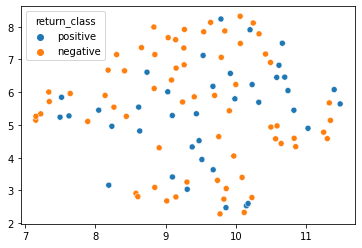

In [ ]:
sns_plot = sns.scatterplot(umap_stocks[:,0], umap_stocks[:,1], hue = stock_stats['return_class'])
figure = sns_plot.get_figure()    
figure.savefig('UMAP with 2 components')

In [ ]:
# UMAP with 11 components
reducer = umap.UMAP(n_components=2)
umap_stocks = reducer.fit_transform(stock_stats_scaled)
umap_stocks.shape

(103, 2)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


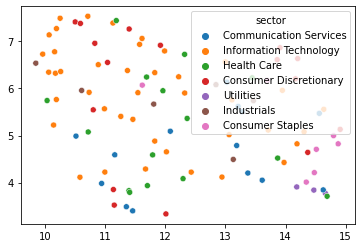

In [ ]:
sns_plot = sns.scatterplot(umap_stocks[:,0], umap_stocks[:,1], hue = stock_stats['sector'])
figure = sns_plot.get_figure()    
figure.savefig('UMAP with 8 components')

shows that the There is now growth distribution in different sectors if we would have a separate cluster of dots it would mean that that sector is outstand for some reason but this means taht we sould invest in cross sector


Future change do not use umap dor sectors!!!!!!!!!!!!!! or change the dimentions

#UML for the prices

In [ ]:
df_for_clustering = df.transpose()
df_for_clustering

date,2019-01-02,2019-01-03,2019-01-04,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-14,2019-01-15,2019-01-16,2019-01-17,2019-01-18,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-28,2019-01-29,2019-01-30,2019-01-31,2019-02-01,2019-02-04,2019-02-05,2019-02-06,2019-02-07,2019-02-08,2019-02-11,2019-02-12,2019-02-13,2019-02-14,2019-02-15,2019-02-19,2019-02-20,2019-02-21,2019-02-22,2019-02-25,2019-02-26,2019-02-27,2019-02-28,...,2020-10-02,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-09,2020-10-12,2020-10-13,2020-10-14,2020-10-15,2020-10-16,2020-10-19,2020-10-20,2020-10-21,2020-10-22,2020-10-23,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-11-02,2020-11-03,2020-11-04,2020-11-05,2020-11-06,2020-11-09,2020-11-10,2020-11-11,2020-11-12,2020-11-13,2020-11-16,2020-11-17,2020-11-18,2020-11-19,2020-11-20,2020-11-23,2020-11-24,2020-11-25,2020-11-27
ATVI,47.029999,45.360001,47.169998,48.500000,49.970001,50.830002,51.349998,46.540001,47.290001,46.840000,47.130001,47.380001,48.650002,47.060001,46.020000,47.270000,47.799999,46.740002,45.730000,46.310001,47.240002,46.009998,46.779999,47.840000,43.000000,43.959999,43.410000,40.110001,41.669998,44.570000,45.430000,44.599998,44.480000,42.779999,41.900002,41.500000,41.959999,42.080002,41.790001,42.139999,...,78.300003,79.989998,78.300003,78.470001,77.800003,78.209999,81.059998,81.980003,81.900002,80.349998,80.620003,80.080002,80.139999,81.940002,80.769997,81.040001,80.489998,80.959999,79.010002,77.769997,75.730003,76.400002,76.260002,79.370003,80.139999,78.809998,75.410004,75.120003,76.550003,76.709999,77.550003,77.440002,77.110001,75.500000,75.930000,76.809998,75.919998,75.230003,76.510002,78.139999
ADBE,224.570007,215.699997,226.190002,229.259995,232.679993,235.429993,237.770004,237.550003,234.559998,242.360001,241.949997,244.399994,247.509995,243.850006,245.139999,242.559998,244.949997,241.850006,238.270004,242.669998,247.820007,247.380005,254.740005,254.820007,254.350006,253.740005,257.000000,258.390015,261.369995,260.230011,260.140015,259.450012,257.809998,258.100006,257.760010,258.899994,258.619995,261.220001,262.899994,262.500000,...,478.989990,486.470001,478.980011,493.149994,490.839996,502.160004,510.890015,514.309998,506.309998,501.149994,502.820007,495.200012,494.579987,495.959991,483.600006,488.500000,475.200012,478.559998,456.970001,461.109985,447.100006,444.940002,454.019989,487.230011,496.470001,494.630005,471.140015,452.000000,467.750000,462.579987,469.339996,460.950012,467.950012,459.470001,466.410004,462.920013,460.609985,462.700012,470.079987,477.029999
AMD,18.830000,17.049999,19.000000,20.570000,20.750000,20.190001,19.740000,20.270000,20.230000,20.379999,19.730000,20.250000,20.770000,19.760000,19.799999,20.850000,21.930000,20.180000,19.250000,23.090000,24.410000,24.510000,24.129999,23.309999,23.260000,22.670000,23.049999,22.959999,22.820000,22.850000,23.129999,23.680000,23.950001,23.950001,23.920000,24.360001,24.709999,24.209999,23.480000,23.530001,...,81.800003,86.150002,84.480003,86.690002,86.510002,83.099998,84.290001,85.279999,84.209999,83.129997,83.169998,82.000000,81.559998,79.199997,79.419998,81.959999,82.230003,78.879997,76.400002,78.019997,75.290001,74.699997,76.580002,81.349998,83.000000,85.879997,83.120003,77.989998,81.279999,81.839996,81.430000,83.730003,83.360001,82.540001,85.540001,84.639999,85.309998,85.070000,86.709999,87.190002
ALXN,98.050003,100.209999,106.000000,107.940002,108.610001,109.959999,110.930000,111.129997,107.580002,111.730003,111.699997,114.620003,117.050003,114.290001,117.000000,117.910004,121.440002,119.209999,119.610001,121.320000,122.959999,126.279999,123.750000,122.870003,121.029999,118.790001,120.139999,120.050003,124.260002,125.180000,125.930000,129.419998,128.929993,129.839996,127.550003,129.729996,133.169998,133.289993,136.009995,135.330002,...,111.550003,115.250000,116.080002,125.330002,123.139999,124.519997,124.379997,123.750000,122.519997,122.029999,124.129997,121.760002,124.000000,118.190002,119

In [ ]:
df_for_clustering.dropna(inplace=True)
df_for_clustering=df_for_clustering[:-1]
df_for_clustering

date,2019-01-02,2019-01-03,2019-01-04,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-14,2019-01-15,2019-01-16,2019-01-17,2019-01-18,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-28,2019-01-29,2019-01-30,2019-01-31,2019-02-01,2019-02-04,2019-02-05,2019-02-06,2019-02-07,2019-02-08,2019-02-11,2019-02-12,2019-02-13,2019-02-14,2019-02-15,2019-02-19,2019-02-20,2019-02-21,2019-02-22,2019-02-25,2019-02-26,2019-02-27,2019-02-28,...,2020-10-02,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-09,2020-10-12,2020-10-13,2020-10-14,2020-10-15,2020-10-16,2020-10-19,2020-10-20,2020-10-21,2020-10-22,2020-10-23,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-11-02,2020-11-03,2020-11-04,2020-11-05,2020-11-06,2020-11-09,2020-11-10,2020-11-11,2020-11-12,2020-11-13,2020-11-16,2020-11-17,2020-11-18,2020-11-19,2020-11-20,2020-11-23,2020-11-24,2020-11-25,2020-11-27
ATVI,47.029999,45.360001,47.169998,48.500000,49.970001,50.830002,51.349998,46.540001,47.290001,46.840000,47.130001,47.380001,48.650002,47.060001,46.020000,47.270000,47.799999,46.740002,45.730000,46.310001,47.240002,46.009998,46.779999,47.840000,43.000000,43.959999,43.410000,40.110001,41.669998,44.570000,45.430000,44.599998,44.480000,42.779999,41.900002,41.500000,41.959999,42.080002,41.790001,42.139999,...,78.300003,79.989998,78.300003,78.470001,77.800003,78.209999,81.059998,81.980003,81.900002,80.349998,80.620003,80.080002,80.139999,81.940002,80.769997,81.040001,80.489998,80.959999,79.010002,77.769997,75.730003,76.400002,76.260002,79.370003,80.139999,78.809998,75.410004,75.120003,76.550003,76.709999,77.550003,77.440002,77.110001,75.500000,75.930000,76.809998,75.919998,75.230003,76.510002,78.139999
ADBE,224.570007,215.699997,226.190002,229.259995,232.679993,235.429993,237.770004,237.550003,234.559998,242.360001,241.949997,244.399994,247.509995,243.850006,245.139999,242.559998,244.949997,241.850006,238.270004,242.669998,247.820007,247.380005,254.740005,254.820007,254.350006,253.740005,257.000000,258.390015,261.369995,260.230011,260.140015,259.450012,257.809998,258.100006,257.760010,258.899994,258.619995,261.220001,262.899994,262.500000,...,478.989990,486.470001,478.980011,493.149994,490.839996,502.160004,510.890015,514.309998,506.309998,501.149994,502.820007,495.200012,494.579987,495.959991,483.600006,488.500000,475.200012,478.559998,456.970001,461.109985,447.100006,444.940002,454.019989,487.230011,496.470001,494.630005,471.140015,452.000000,467.750000,462.579987,469.339996,460.950012,467.950012,459.470001,466.410004,462.920013,460.609985,462.700012,470.079987,477.029999
AMD,18.830000,17.049999,19.000000,20.570000,20.750000,20.190001,19.740000,20.270000,20.230000,20.379999,19.730000,20.250000,20.770000,19.760000,19.799999,20.850000,21.930000,20.180000,19.250000,23.090000,24.410000,24.510000,24.129999,23.309999,23.260000,22.670000,23.049999,22.959999,22.820000,22.850000,23.129999,23.680000,23.950001,23.950001,23.920000,24.360001,24.709999,24.209999,23.480000,23.530001,...,81.800003,86.150002,84.480003,86.690002,86.510002,83.099998,84.290001,85.279999,84.209999,83.129997,83.169998,82.000000,81.559998,79.199997,79.419998,81.959999,82.230003,78.879997,76.400002,78.019997,75.290001,74.699997,76.580002,81.349998,83.000000,85.879997,83.120003,77.989998,81.279999,81.839996,81.430000,83.730003,83.360001,82.540001,85.540001,84.639999,85.309998,85.070000,86.709999,87.190002
ALXN,98.050003,100.209999,106.000000,107.940002,108.610001,109.959999,110.930000,111.129997,107.580002,111.730003,111.699997,114.620003,117.050003,114.290001,117.000000,117.910004,121.440002,119.209999,119.610001,121.320000,122.959999,126.279999,123.750000,122.870003,121.029999,118.790001,120.139999,120.050003,124.260002,125.180000,125.930000,129.419998,128.929993,129.839996,127.550003,129.729996,133.169998,133.289993,136.009995,135.330002,...,111.550003,115.250000,116.080002,125.330002,123.139999,124.519997,124.379997,123.750000,122.519997,122.029999,124.129997,121.760002,124.000000,118.190002,119

In [ ]:
df_scaled = StandardScaler().fit_transform(df_for_clustering)
umap_reducer = umap.UMAP()
df_reduced = umap_reducer.fit_transform(df_scaled)

In [ ]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


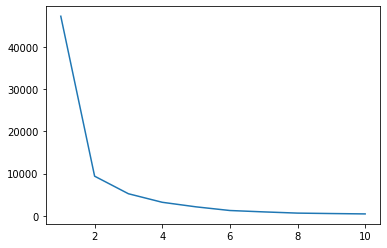

In [ ]:
inertia = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    inertia.append(kmeanModel.inertia_)
sns.lineplot(K, inertia)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


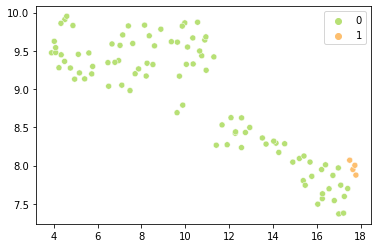

In [ ]:
clusterer = KMeans(n_clusters=2)
clusterer.fit(df_scaled)
sns.scatterplot(df_reduced[:,0], df_reduced[:,1],hue = clusterer.labels_, palette = "RdYlGn_r")

In [ ]:
df_for_clustering["cluster"] = clusterer.labels_
df_for_clustering[df_for_clustering["cluster"]==1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


date,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-07 00:00:00,2019-01-08 00:00:00,2019-01-09 00:00:00,2019-01-10 00:00:00,2019-01-11 00:00:00,2019-01-14 00:00:00,2019-01-15 00:00:00,2019-01-16 00:00:00,2019-01-17 00:00:00,2019-01-18 00:00:00,2019-01-22 00:00:00,2019-01-23 00:00:00,2019-01-24 00:00:00,2019-01-25 00:00:00,2019-01-28 00:00:00,2019-01-29 00:00:00,2019-01-30 00:00:00,2019-01-31 00:00:00,2019-02-01 00:00:00,2019-02-04 00:00:00,2019-02-05 00:00:00,2019-02-06 00:00:00,2019-02-07 00:00:00,2019-02-08 00:00:00,2019-02-11 00:00:00,2019-02-12 00:00:00,2019-02-13 00:00:00,2019-02-14 00:00:00,2019-02-15 00:00:00,2019-02-19 00:00:00,2019-02-20 00:00:00,2019-02-21 00:00:00,2019-02-22 00:00:00,2019-02-25 00:00:00,2019-02-26 00:00:00,2019-02-27 00:00:00,2019-02-28 00:00:00,...,2020-10-05 00:00:00,2020-10-06 00:00:00,2020-10-07 00:00:00,2020-10-08 00:00:00,2020-10-09 00:00:00,2020-10-12 00:00:00,2020-10-13 00:00:00,2020-10-14 00:00:00,2020-10-15 00:00:00,2020-10-16 00:00:00,2020-10-19 00:00:00,2020-10-20 00:00:00,2020-10-21 00:00:00,2020-10-22 00:00:00,2020-10-23 00:00:00,2020-10-26 00:00:00,2020-10-27 00:00:00,2020-10-28 00:00:00,2020-10-29 00:00:00,2020-10-30 00:00:00,2020-11-02 00:00:00,2020-11-03 00:00:00,2020-11-04 00:00:00,2020-11-05 00:00:00,2020-11-06 00:00:00,2020-11-09 00:00:00,2020-11-10 00:00:00,2020-11-11 00:00:00,2020-11-12 00:00:00,2020-11-13 00:00:00,2020-11-16 00:00:00,2020-11-17 00:00:00,2020-11-18 00:00:00,2020-11-19 00:00:00,2020-11-20 00:00:00,2020-11-23 00:00:00,2020-11-24 00:00:00,2020-11-25 00:00:00,2020-11-27 00:00:00,cluster
GOOGL,1054.680054,1025.469971,1078.069946,1075.920044,1085.369995,1081.650024,1078.829956,1064.469971,1051.510010,1086.510010,1089.510010,1099.119995,1107.300049,1078.630005,1084.410034,1084.000000,1101.510010,1079.859985,1070.060059,1097.989990,1125.890015,1118.619995,1141.420044,1151.869995,1122.890015,1105.910034,1102.380005,1102.119995,1127.579956,1128.630005,1129.199951,1119.630005,1126.510010,1120.589966,1104.209961,1116.560059,1117.329956,1122.010010,1122.890015,1126.550049,...,1482.829956,1451.020020,1459.140015,1483.430054,1510.449951,1564.589966,1567.069946,1563.439941,1555.469971,1567.699951,1529.949951,1551.079956,1585.989990,1606.660034,1632.979980,1584.290039,1598.880005,1510.800049,1556.880005,1616.109985,1624.319946,1645.660034,1745.849976,1762.500000,1759.729980,1761.420044,1737.719971,1747.229980,1742.819946,1772.260010,1774.030029,1761.660034,1740.640015,1758.569946,1736.380005,1727.560059,1763.900024,1764.130005,1787.020020,1
GOOG,1045.849976,1016.059998,1070.709961,1068.390015,1076.280029,1074.660034,1070.329956,1057.189941,1044.689941,1077.150024,1080.969971,1089.900024,1098.260010,1070.520020,1075.569946,1073.900024,1090.989990,1070.079956,1060.619995,1089.060059,1116.369995,1110.750000,1132.800049,1145.989990,1115.229980,1098.709961,1095.060059,1095.010010,1121.369995,1120.160034,1121.670044,1113.650024,1118.560059,1113.800049,1096.969971,1110.369995,1109.400024,1115.130005,1116.050049,1119.920044,...,1486.020020,1453.439941,1460.290039,1485.930054,1515.219971,1569.150024,1571.680054,1568.079956,1559.130005,1573.010010,1534.609985,1555.930054,1593.310059,1615.329956,1641.000000,1590.449951,1604.260010,1516.619995,1567.239990,1621.010010,1626.030029,1650.209961,1749.130005,1763.369995,1761.750000,1763.000000,1740.390015,1752.709961,1749.839966,1777.020020,1781.380005,1770.150024,1746.780029,1763.920044,1742.189941,1734.859985,1768.880005,1771.430054,1793.189941,1
AMZN,1539.130005,1500.280029,1575.390015,1629.510010,1656.579956,1659.420044,1656.219971,1640.560059,1617.209961,1674.560059,1683.780029,1693.219971,1696.199951,1632.170044,1640.020020,1654.930054,1670.569946,1637.890015,1593.880005,1670.430054,1718.729980,1626.229980,1633.310059,1658.810059,1640.260010,1614.369995,1588.219971,1591.000000,1638.010010,1640.000000,1622.650024,1607.949951,1627.579956,1622.099976,1619.439941,1631.560059,1633.000000,1636.400024,1641.089966,1639.829956

In [ ]:
df_for_clustering[df_for_clustering["cluster"]==1].describe()

date,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-07 00:00:00,2019-01-08 00:00:00,2019-01-09 00:00:00,2019-01-10 00:00:00,2019-01-11 00:00:00,2019-01-14 00:00:00,2019-01-15 00:00:00,2019-01-16 00:00:00,2019-01-17 00:00:00,2019-01-18 00:00:00,2019-01-22 00:00:00,2019-01-23 00:00:00,2019-01-24 00:00:00,2019-01-25 00:00:00,2019-01-28 00:00:00,2019-01-29 00:00:00,2019-01-30 00:00:00,2019-01-31 00:00:00,2019-02-01 00:00:00,2019-02-04 00:00:00,2019-02-05 00:00:00,2019-02-06 00:00:00,2019-02-07 00:00:00,2019-02-08 00:00:00,2019-02-11 00:00:00,2019-02-12 00:00:00,2019-02-13 00:00:00,2019-02-14 00:00:00,2019-02-15 00:00:00,2019-02-19 00:00:00,2019-02-20 00:00:00,2019-02-21 00:00:00,2019-02-22 00:00:00,2019-02-25 00:00:00,2019-02-26 00:00:00,2019-02-27 00:00:00,2019-02-28 00:00:00,...,2020-10-05 00:00:00,2020-10-06 00:00:00,2020-10-07 00:00:00,2020-10-08 00:00:00,2020-10-09 00:00:00,2020-10-12 00:00:00,2020-10-13 00:00:00,2020-10-14 00:00:00,2020-10-15 00:00:00,2020-10-16 00:00:00,2020-10-19 00:00:00,2020-10-20 00:00:00,2020-10-21 00:00:00,2020-10-22 00:00:00,2020-10-23 00:00:00,2020-10-26 00:00:00,2020-10-27 00:00:00,2020-10-28 00:00:00,2020-10-29 00:00:00,2020-10-30 00:00:00,2020-11-02 00:00:00,2020-11-03 00:00:00,2020-11-04 00:00:00,2020-11-05 00:00:00,2020-11-06 00:00:00,2020-11-09 00:00:00,2020-11-10 00:00:00,2020-11-11 00:00:00,2020-11-12 00:00:00,2020-11-13 00:00:00,2020-11-16 00:00:00,2020-11-17 00:00:00,2020-11-18 00:00:00,2020-11-19 00:00:00,2020-11-20 00:00:00,2020-11-23 00:00:00,2020-11-24 00:00:00,2020-11-25 00:00:00,2020-11-27 00:00:00,cluster
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0
mean,1340.339996,1301.232498,1360.429993,1371.410004,1376.287506,1366.305023,1370.677460,1357.027496,1351.572479,1384.132538,1383.707489,1401.687500,1415.505005,1372.575012,1386.077515,1402.125031,1416.317474,1400.357483,1383.340027,1419.045013,1448.450012,1423.139984,1442.130035,1464.732513,1446.327515,1424.012512,1414.187500,1413.282501,1445.562500,1452.190002,1443.962494,1443.699982,1452.037506,1445.665009,1431.732483,1442.252533,1437.440002,1447.317505,1446.507507,1395.835022,...,1968.709991,1928.532471,1968.492493,1987.180054,2032.552460,2105.417480,2090.837463,2056.957458,2038.839966,2020.322479,1981.197479,1998.932495,2016.567505,2047.602478,2075.482483,2032.767517,2046.795013,1948.812531,1991.347504,1973.942474,1964.739990,2003.464966,2112.364960,2154.045013,2154.150024,2196.600006,2130.142487,2159.337463,2141.464996,2182.740051,2199.020050,2187.179993,2159.369995,2162.619995,2142.684967,2145.162476,2188.572510,2196.107544,2207.054993,1.0
std,343.161215,330.631117,335.364199,347.193497,341.415639,332.763885,342.030148,342.188659,351.789936,349.224423,344.660707,354.947921,362.068294,345.542457,356.012907,377.590275,373.493113,382.532331,377.551705,380.738277,380.835046,366.429823,364.282401,377.966557,393.277640,386.651862,382.148925,380.241893,385.358959,395.400921,385.131080,400.376889,400.718727,399.091686,399.914536,396.372462,388.656710,396.373539,392.821460,315.648255,...,826.997908,790.328351,830.195407,814.957182,848.344328,901.264668,907.362849,874.713407,869.225930,836.192314,819.323252,813.963652,780.720145,757.362923,757.739618,786.564749,827.601481,810.459757,813.754672,708.143547,693.231335,696.707162,752.703535,778.640861,771.5

In [ ]:
df_for_clustering[df_for_clustering["cluster"]==0].describe()

date,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-07 00:00:00,2019-01-08 00:00:00,2019-01-09 00:00:00,2019-01-10 00:00:00,2019-01-11 00:00:00,2019-01-14 00:00:00,2019-01-15 00:00:00,2019-01-16 00:00:00,2019-01-17 00:00:00,2019-01-18 00:00:00,2019-01-22 00:00:00,2019-01-23 00:00:00,2019-01-24 00:00:00,2019-01-25 00:00:00,2019-01-28 00:00:00,2019-01-29 00:00:00,2019-01-30 00:00:00,2019-01-31 00:00:00,2019-02-01 00:00:00,2019-02-04 00:00:00,2019-02-05 00:00:00,2019-02-06 00:00:00,2019-02-07 00:00:00,2019-02-08 00:00:00,2019-02-11 00:00:00,2019-02-12 00:00:00,2019-02-13 00:00:00,2019-02-14 00:00:00,2019-02-15 00:00:00,2019-02-19 00:00:00,2019-02-20 00:00:00,2019-02-21 00:00:00,2019-02-22 00:00:00,2019-02-25 00:00:00,2019-02-26 00:00:00,2019-02-27 00:00:00,2019-02-28 00:00:00,...,2020-10-05 00:00:00,2020-10-06 00:00:00,2020-10-07 00:00:00,2020-10-08 00:00:00,2020-10-09 00:00:00,2020-10-12 00:00:00,2020-10-13 00:00:00,2020-10-14 00:00:00,2020-10-15 00:00:00,2020-10-16 00:00:00,2020-10-19 00:00:00,2020-10-20 00:00:00,2020-10-21 00:00:00,2020-10-22 00:00:00,2020-10-23 00:00:00,2020-10-26 00:00:00,2020-10-27 00:00:00,2020-10-28 00:00:00,2020-10-29 00:00:00,2020-10-30 00:00:00,2020-11-02 00:00:00,2020-11-03 00:00:00,2020-11-04 00:00:00,2020-11-05 00:00:00,2020-11-06 00:00:00,2020-11-09 00:00:00,2020-11-10 00:00:00,2020-11-11 00:00:00,2020-11-12 00:00:00,2020-11-13 00:00:00,2020-11-16 00:00:00,2020-11-17 00:00:00,2020-11-18 00:00:00,2020-11-19 00:00:00,2020-11-20 00:00:00,2020-11-23 00:00:00,2020-11-24 00:00:00,2020-11-25 00:00:00,2020-11-27 00:00:00,cluster
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,...,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.0
mean,106.282923,103.481783,108.024881,109.768892,110.571633,112.268850,113.123247,113.086171,111.930501,113.836352,113.570936,114.862720,116.402990,114.361920,114.159370,115.535276,117.014309,115.718664,115.085555,117.000749,118.885120,119.288107,120.107606,120.748228,120.650255,119.321841,119.984427,120.404910,122.654677,122.468491,122.796592,123.985606,123.901065,124.014269,123.164420,124.228648,124.622979,124.359582,125.197876,125.303342,...,193.424787,190.930320,195.105212,196.166596,198.928192,202.809361,204.182234,202.281701,200.809947,201.062020,198.271595,198.636277,197.122447,197.968191,199.231703,195.730319,196.064627,190.177765,192.584361,187.340425,188.670213,192.371489,201.347340,206.485852,207.374042,201.742979,197.537340,202.091701,200.731915,202.964149,203.713299,203.104789,201.788723,204.158086,203.847446,204.895531,206.099150,207.361809,210.068831,0.0
std,87.267670,85.859697,89.895681,91.197318,91.193149,93.819969,94.484273,94.279012,93.327959,95.631988,95.374886,97.171012,97.828426,95.722900,95.113526,95.650241,95.516168,94.209356,93.907003,95.269573,97.796558,97.971818,98.518611,98.623002,97.939093,96.524064,97.044286,97.778028,100.055693,99.330402,99.931566,101.486464,101.542210,101.699659,100.780489,101.937701,101.941499,101.663054,104.134413,104.399375,...,177.438986,175.098196,180.767807,182.135189,185.596500,188.980931,193.185181,190.140764,190.123325,191.020741,189.575770,192.033259,188.715725,189.198233,191.220143,187.371867,187.706834,183.391811,185.827259,177.746254,178.793508,182.010388,192.536760,202.345443,205.652655,192.644412,184.048309,1

In [ ]:
df.head()

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AEP,AMGN,ADI,ANSS,AAPL,AMAT,ASML,TEAM,ADSK,ADP,BIDU,BIIB,BKNG,AVGO,CDNS,CDW,CERN,CHTR,CHKP,CTAS,CSCO,CTSH,CMCSA,CPRT,COST,CSX,DXCM,DOCU,DLTR,EBAY,EA,EXC,...,MCHP,MU,MSFT,MRNA,MDLZ,MNST,NTES,NFLX,NVDA,NXPI,ORLY,OKTA,PCAR,PAYX,PYPL,PTON,PEP,PDD,QCOM,REGN,ROST,SGEN,SIRI,SWKS,SPLK,SBUX,SNPS,TMUS,TSLA,TXN,TCOM,VRSN,VRSK,VRTX,WBA,WDAY,XEL,XLNX,ZM,average
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02,47.029999,224.570007,18.830000,98.050003,202.119995,1054.680054,1045.849976,1539.130005,72.940002,191.899994,85.919998,143.009995,39.480000,33.480000,156.300003,89.029999,128.960007,130.139999,162.250000,304.690002,1721.699951,253.509995,43.230000,79.169998,51.869999,287.989990,103.500000,167.490005,42.950001,63.090000,34.369999,47.680000,204.759995,61.950001,115.180000,40.820000,91.199997,28.850000,80.370003,44.070000,...,71.349998,32.750000,101.120003,15.330000,39.889999,48.759998,45.948002,267.660004,136.220001,75.029999,341.149994,63.259998,57.860001,65.070000,85.750000,NaN,109.279999,22.209999,57.400002,372.440002,83.779999,57.490002,5.90,67.959999,103.320000,64.320000,84.050003,65.260002,62.023998,94.449997,27.590000,147.759995,108.650002,164.080002,68.040001,159.740005,48.220001,86.849998,NaN,156.652599
2019-01-03,45.360001,215.699997,17.049999,100.209999,184.779999,1025.469971,1016.059998,1500.280029,72.769997,188.979996,80.730003,137.639999,35.547501,31.540001,147.679993,84.480003,121.849998,126.209999,154.710007,307.000000,1663.119995,230.960007,41.529999,77.129997,50.700001,287.500000,102.349998,164.809998,41.070000,61.099998,34.639999,46.889999,200.419998,60.980000,112.260002,38.830002,90.760002,28.320000,78.709999,44.119999,...,66.320000,31.000000,97.400002,15.500000,39.740002,48.000000,44.180000,271.200012,127.989998,71.970001,346.130005,59.560001,56.520000,63.970001,82.089996,NaN,108.260002,21.520000,55.700001,372.079987,83.080002,56.369999,5.94,60.720001,100.809998,61.529999,81.110001,65.019997,60.071999,88.879997,26.959999,142.589996,105.330002,163.729996,67.330002,154.020004,48.029999,83.580002,NaN,152.369567
2019-01-04,47.169998,226.190002,19.000000,106.000000,186.710007,1078.069946,1070.709961,1575.390015,73.440002,195.440002,82.690002,143.660004,37.064999,33.700001,154.070007,87.089996,128.279999,131.240005,160.949997,318.329987,1717.550049,233.229996,43.259998,77.879997,52.230000,302.739990,105.349998,172.559998,42.919998,63.700001,35.810001,48.560001,206.240005,62.790001,116.239998,40.900002,92.889999,28.969999,84.419998,44.619999,...,69.010002,32.700001,101.930000,16.959999,40.840000,49.790001,45.950001,297.570007,136.190002,75.449997,341.820007,63.150002,59.029999,66.199997,86.269997,NaN,110.480003,22.690001,56.599998,397.549988,85.339996,59.540001,6.17,63.630001,108.040001,63.570000,83.900002,67.489998,63.537998,92.900002,28.549999,148.970001,109.980003,172.699997,69.570000,163.350006,48.500000,87.449997,NaN,159.143457
2019-01-07,48.500000,229.259995,20.570000,107.940002,189.919998,1075.920044,1068.390015,1629.510010,73.029999,198.070007,83.209999,147.320007,36.982498,34.299999,157.589996,92.709999,132.720001,130.529999,162.600006,322.399994,1711.819946,237.979996,43.419998,77.570000,51.930000,301.470001,104.870003,172.850006,43.209999,63.599998,35.430000,48.830002,207.000000,62.450001,129.949997,41.689999,97.959999,29.469999,87.589996,44.700001,...,71.029999,34.000000,102.059998,16.270000,41.119999,49.730000,47.897999,315.339996,143.399994,76.010002,339.690002,66.269997,58.959999,65.849998,86.930000,NaN,109.529999,23.209999,56.439999,396.630005,88.930000,62.919998,6.22,64.489998,112.900002,63.570000,85.760002,68.440002,66.991997,94.500000,29.180000,151.399994,110.089996,175.850006,69.970001,163.500000,48.290001,89.760002,NaN,161.264447
2019-01-08,49.970001,232.679993,20.750000,108.610001,192.949997,1085.369995,1076.280029,1656.579956,73.930000,200.610001,85.239998,148.050003,37.687500,32.910000,156.429993,94.820000,133.8

In [ ]:
df_out=df.loc[:,['TSLA','GOOGL','ALXN','AMZN']]

In [ ]:
df_out.to_csv("yf_chosen_comp.csv")
